In [104]:
import pandas as pd
import numpy as np

In this project, we will analyze the CO2 emissions per area in the world, and evolution through years using pandas. No plot will be made yet.

In [105]:
#dataset filepaths
co2_dataset = '../../Datasets/CO2_emission_by_countries.csv'

Reading dataset using encoding `windows-1252`

In [106]:
co2_df = pd.read_csv(co2_dataset, sep=',', header=0, encoding='windows-1252')
co2_df.head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²


In [107]:
countries = co2_df['Country'].drop_duplicates()
countries = countries.values.tolist()

Let's include a new column which matches countries with regions, but first of all, we gotta make sure that each geographic region matches with countries in dataset, it could happen that some geopolitical interpretations could be wrong among countries lists and countries in df.

In [108]:
south_america_countries = ['Colombia', 'Venezuela', 'Suriname', 'French Guiana', 'Guyana', 'Ecuador', 'Peru', 'Bolivia', 'Chile', 'Paraguay', 'Brazil', 'Uruguay', 'Argentina']
asia_countries = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia',
    'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
    'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar',
    'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia',
    'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor',
    'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen', 'Macao', 'Christmas Island', 'Hong Kong'
]
europe_countries = [
    'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
    'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
    'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta',
    'Moldova', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal',
    'Romania', 'Russia', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
    'Ukraine', 'United Kingdom', 'Faeroe Islands', 'Greenland', 'Sint Maarten (Dutch part)', 'Martinique', 'Bermuda', 'Aruba'
]
africa_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cameroon',
    'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of Congo', 'Congo',
    'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
    'Guinea', 'Guinea-Bissau', "Cote d'Ivoire", 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi',
    'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
    'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan',
    'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 'Mayotte', 'Saint Helena', 'Reunion'
]
north_america_countries = [
    'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica',
    'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico',
    'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines',
    'Trinidad and Tobago', 'United States', 'Montserrat', 'Anguilla', 'Bermuda', 'Aruba', 'Turks and Caicos Islands', 'Guadeloupe', 'Saint Pierre and Miquelon', 'Puerto Rico', 'Curacao'
]
oceania_countries = [
    'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea',
    'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu', 'New Caledonia', 'Wallis and Futuna', 'French Polynesia', 'Niue', 'Cook Islands'
]



In [109]:
matches = [x for x in europe_countries if x not in countries]
print(matches)

[]


In [110]:
matches = [x for x in asia_countries if x not in countries]
print(matches)

[]


In [111]:
matches = [x for x in africa_countries if x not in countries]
print(matches)

[]


In [112]:
text = "D'"
matches = co2_df['Country'].str.contains(text, case=False)

# Filter the DataFrame based on the matches
matched_df = co2_df[matches]
matched_df.head(2)

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
12466,Cote d'Ivoire,CI,NaN,1750,0.0,NaN,NaN,NaN,NaN
12467,Cote d'Ivoire,CI,NaN,1751,0.0,NaN,NaN,NaN,NaN


In [113]:
def match_countries(world, africa=africa_countries, asia=asia_countries, north_america=north_america_countries, south_america=south_america_countries, oceania=oceania_countries, europe=europe_countries):
    for i in world['Country']:
        if i in africa:
            world['Region'] == 'Africa'
        elif i in asia:
            world['Region'] == 'Asia'
        elif i in north_america:
            world['Region'] == 'North America'
        elif i in south_america:
            world['Region'] == 'South America'
        elif i in oceania:
            world['Region'] == 'Oceania'
        elif i in europe:
            world['Region'] == 'Europe'
        else:
            return np.nan

In [114]:
df = co2_df.copy()

In [115]:
def extract_country(dataframe, region):
    empty_list = []
    for i in dataframe['Country']:
        empty_list.append(i)
    return set(empty_list) & set(region)

##### Match African countries

In [116]:
print(extract_country(df, africa_countries))
print(len(extract_country(df, africa_countries)), len(africa_countries))

{'Nigeria', 'Guinea', 'Reunion', 'Algeria', 'Ghana', 'Senegal', 'Mayotte', 'South Sudan', 'Burundi', 'Eswatini', 'Gabon', 'Lesotho', 'Comoros', 'Benin', 'Mauritius', 'Mali', 'Madagascar', 'Tunisia', 'Guinea-Bissau', 'Mauritania', 'Zambia', 'Namibia', 'Rwanda', 'Kenya', 'Morocco', 'Angola', 'Niger', 'Zimbabwe', 'Togo', 'Cape Verde', 'Equatorial Guinea', 'Democratic Republic of Congo', 'Djibouti', 'Libya', 'Sao Tome and Principe', 'Chad', 'Ethiopia', 'Malawi', 'Botswana', 'Seychelles', 'Central African Republic', 'Somalia', "Cote d'Ivoire", 'Sierra Leone', 'Saint Helena', 'Gambia', 'Sudan', 'South Africa', 'Liberia', 'Congo', 'Uganda', 'Cameroon', 'Egypt', 'Mozambique', 'Burkina Faso', 'Eritrea', 'Tanzania'}
57 57


##### Match Asian countries

In [117]:
print(extract_country(df, asia_countries))
print(len(extract_country(df, asia_countries)), len(asia_countries))

{'Jordan', 'Japan', 'Maldives', 'Kyrgyzstan', 'Bhutan', 'Georgia', 'Uzbekistan', 'Myanmar', 'Pakistan', 'India', 'Nepal', 'Turkey', 'North Korea', 'Palestine', 'Christmas Island', 'Saudi Arabia', 'Yemen', 'South Korea', 'Kuwait', 'Bangladesh', 'Vietnam', 'Iran', 'Philippines', 'Indonesia', 'Sri Lanka', 'Tajikistan', 'Malaysia', 'Bahrain', 'Armenia', 'Qatar', 'United Arab Emirates', 'Hong Kong', 'Afghanistan', 'Cambodia', 'Kazakhstan', 'Laos', 'Oman', 'Brunei', 'Russia', 'Turkmenistan', 'Cyprus', 'Singapore', 'Israel', 'Thailand', 'Timor', 'Iraq', 'Mongolia', 'Azerbaijan', 'China', 'Syria', 'Macao', 'Lebanon', 'Taiwan'}
53 53


##### Match Europe countries

In [118]:
print(extract_country(df, europe_countries))
print(len(extract_country(df, europe_countries)), len(europe_countries))

{'Denmark', 'Czechia', 'Italy', 'Sint Maarten (Dutch part)', 'Bulgaria', 'Malta', 'Netherlands', 'Lithuania', 'Hungary', 'Greenland', 'Bermuda', 'Austria', 'Bosnia and Herzegovina', 'Switzerland', 'Slovenia', 'Albania', 'Moldova', 'Iceland', 'Slovakia', 'Montenegro', 'Poland', 'Latvia', 'Belarus', 'Estonia', 'France', 'Andorra', 'Belgium', 'Portugal', 'Ireland', 'Luxembourg', 'Spain', 'Ukraine', 'North Macedonia', 'Norway', 'Greece', 'Kosovo', 'Russia', 'Serbia', 'Romania', 'Cyprus', 'Finland', 'Germany', 'Sweden', 'United Kingdom', 'Faeroe Islands', 'Martinique', 'Croatia', 'Liechtenstein', 'Aruba'}
49 49


##### Match North American countries

In [119]:
print(extract_country(df, north_america_countries))
print(len(extract_country(df, north_america_countries)), len(north_america_countries))

{'Canada', 'Bahamas', 'El Salvador', 'Curacao', 'Bermuda', 'Saint Vincent and the Grenadines', 'United States', 'Saint Kitts and Nevis', 'Trinidad and Tobago', 'Grenada', 'Barbados', 'Anguilla', 'Costa Rica', 'Puerto Rico', 'Turks and Caicos Islands', 'Jamaica', 'Dominican Republic', 'Saint Pierre and Miquelon', 'Mexico', 'Cuba', 'Montserrat', 'Antigua and Barbuda', 'Nicaragua', 'Guadeloupe', 'Dominica', 'Saint Lucia', 'Haiti', 'Panama', 'Guatemala', 'Honduras', 'Belize', 'Aruba'}
32 32


##### Match South American countries

In [120]:
print(extract_country(df, south_america_countries))
print(len(extract_country(df, south_america_countries)), len(south_america_countries))

{'Suriname', 'Chile', 'French Guiana', 'Uruguay', 'Bolivia', 'Ecuador', 'Brazil', 'Peru', 'Paraguay', 'Argentina', 'Colombia', 'Guyana', 'Venezuela'}
13 13


##### Match Oceania countries

In [121]:
print(extract_country(df, oceania_countries))
print(len(extract_country(df, oceania_countries)), len(oceania_countries))

{'Wallis and Futuna', 'Fiji', 'Niue', 'Papua New Guinea', 'Tuvalu', 'Nauru', 'Vanuatu', 'Kiribati', 'New Zealand', 'Palau', 'New Caledonia', 'Samoa', 'Solomon Islands', 'Micronesia', 'Australia', 'Tonga', 'French Polynesia', 'Cook Islands', 'Marshall Islands'}
19 19


##### Unmatches between our world country list and ```df['Country']```

In [122]:
our_country_list = set(south_america_countries) | set(north_america_countries) | set(europe_countries) | set(oceania_countries) | set(africa_countries) | set(asia_countries)
for country in set(df['Country']):
    if country not in our_country_list:
        print(country)

Antarctica


We have to create a new column in `df` which matches each country with its corresponding region.

In [123]:
country_region = {'Antarctica': np.nan}
country_region

{'Antarctica': nan}

In [124]:
europe_tuple = tuple(zip(europe_countries, ['Europe']*len(europe_countries)))
south_america_tuple = tuple(zip(south_america_countries, ['South America']*len(south_america_countries)))
north_america_tuple = tuple(zip(north_america_countries, ['North America']*len(north_america_countries)))
africa_tuple = tuple(zip(africa_countries, ['Africa']*len(africa_countries)))
asia_tuple = tuple(zip(asia_countries, ['Asia']*len(asia_countries)))
oceania_tuple = tuple(zip(oceania_countries, ['Oceania']*len(oceania_countries)))

In [125]:
regions_to_append = [europe_tuple, south_america_tuple, north_america_tuple, africa_tuple, asia_tuple, oceania_tuple]
for region in set(regions_to_append):
    country_region.update(region)

In [126]:
df['Region'] = df['Country'].map(country_region)

In [127]:
df[df['Region'] == 'South America'].head(2)

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2),Region
2168,Argentina,AR,54,1750,0.0,45510318.0,2780400.0,1.80%,16/km²,South America
2169,Argentina,AR,54,1751,0.0,45510318.0,2780400.0,1.80%,16/km²,South America


Now, we have to filter by time scales. For instance, 2010s decade.

In [128]:
emissions_sa_2020 = df[(df['Region'] == 'South America') & (df['Year'] == 2020)]
emissions_sa_2020.sort_values('CO2 emission (Tons)', ascending=False).head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2),Region
7587,Brazil,BR,55,2020,1.623851e+10,215313498.0,8515767.0,5.60%,25/km²,South America
2438,Argentina,AR,54,2020,8.431213e+09,45510318.0,2780400.0,1.80%,16/km²,South America
58264,Venezuela,VE,58,2020,7.854692e+09,28301696.0,916445.0,0.60%,31/km²,South America
11381,Colombia,CO,57,2020,3.399103e+09,51874024.0,1141748.0,0.70%,45/km²,South America
10568,Chile,CL,56,2020,2.903063e+09,19603733.0,756102.0,0.50%,26/km²,South America


In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

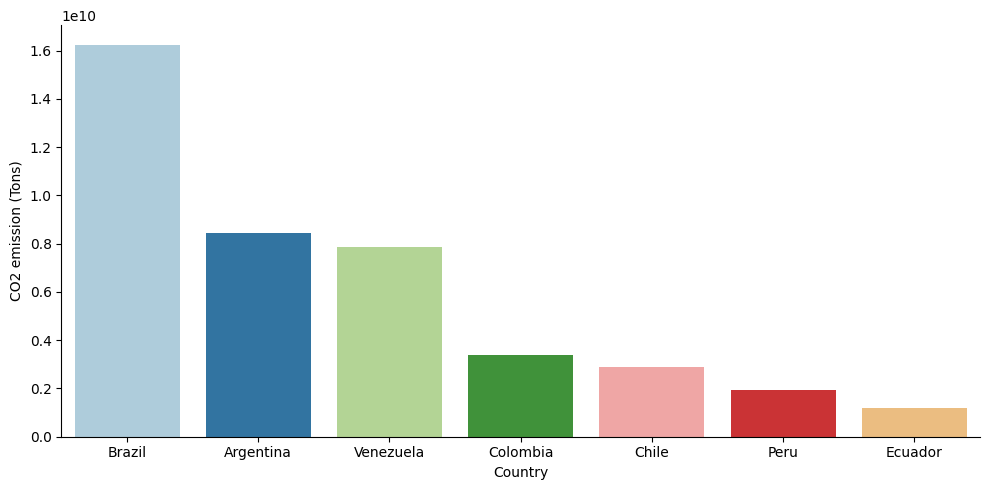

In [130]:
sns.catplot(data = emissions_sa_2020.sort_values('CO2 emission (Tons)', ascending=False).head(7), x = 'Country', y='CO2 emission (Tons)', kind='bar', height=5, aspect=2, palette='Paired', margin_titles=True)
plt.tight_layout()
plt.show()

Now, let's filter 2020 emissions worldwide by region. In this case, pie chart can be used for representing the contribution of each region to GHG production.

In [178]:
region_emissions_2020 = df[df['Year'] == 2020].loc[:,['Region', 'CO2 emission (Tons)']].groupby('Region').sum()
region_emissions_2020

,CO2 emission (Tons)
Region,
Africa,4.761074e+10
Asia,5.333521e+11
Europe,5.311058e+11
North America,4.777489e+11
Oceania,2.098130e+10
South America,4.328872e+10


In [179]:
region_emissions_2020.index

Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object', name='Region')

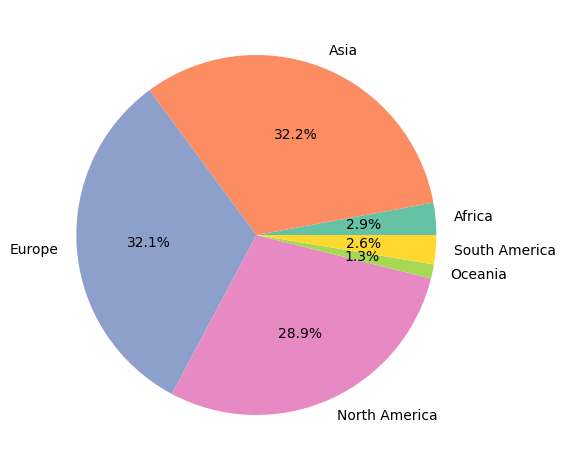

In [181]:
sizes = region_emissions_2020['CO2 emission (Tons)']
labels = region_emissions_2020.index
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']
)
plt.tight_layout()
plt.show()